In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
bank_data = pd.read_csv(r'C:\Users\saedw\OneDrive\Desktop\CECS 456 Machine Learning\Data\bank_marketing.csv')
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [48]:
label = LabelEncoder()
bank_data.job = label.fit_transform(bank_data.job)
bank_data.marital = label.fit_transform(bank_data.marital)
bank_data.education = label.fit_transform(bank_data.education)
bank_data.default = label.fit_transform(bank_data.default)
bank_data.housing = label.fit_transform(bank_data.housing)
bank_data.loan = label.fit_transform(bank_data.loan)
bank_data.contact = label.fit_transform(bank_data.contact)
bank_data.month = label.fit_transform(bank_data.month)
bank_data.day_of_week = label.fit_transform(bank_data.day_of_week)
bank_data.poutcome = label.fit_transform(bank_data.poutcome)

In [49]:
x = bank_data.iloc[:,:-1].values
y = bank_data.iloc[:,-1].values



<AxesSubplot:>

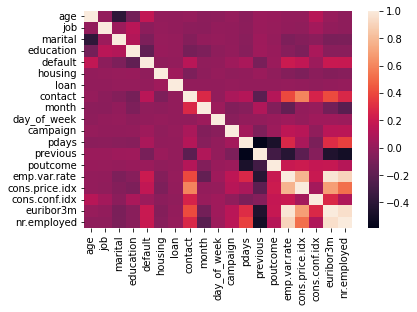

In [50]:
sns.heatmap(data=bank_data.corr())

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=0)

In [52]:
svms = SVC()
svms.fit(x_train,y_train)
svm_score = svms.score(x_test,y_test)



In [53]:
# Regularisation
model_r = SVC(C=4)
model_r.fit(x_train,y_train)
reg_score = model_r.score(x_test,y_test)

In [54]:
#gamma
model_g = SVC(gamma=10)
model_g.fit(x_train,y_train)
g_score = model_g.score(x_test,y_test)

In [55]:
# kernal
model_k = SVC(kernel='rbf')
model_k.fit(x_train,y_train)
kernal_score = model_k.score(x_test,y_test)

In [56]:
model_kl = SVC(kernel='linear')
model_kl.fit(x_train,y_train)
kl_score = model_kl.score(x_test,y_test)

In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Regularisation', 
              'Gamma', 'Gaussian Kernal','Linear SVC'],
    'Score': [svm_score, reg_score, g_score, 
              kernal_score, kl_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Linear SVC,0.897284
0,Support Vector Machines,0.896798
1,Regularisation,0.896798
3,Gaussian Kernal,0.896798
2,Gamma,0.886019
